In [2]:
import seaborn as sns

mpg = sns.load_dataset('mpg')

mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
mpg[mpg['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [6]:
mpg = mpg.dropna()

### b) Use describe only on those columns that are relevant to get statistical information from.

In [10]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


### c) Make some plots on some of the columns that you find interesting.

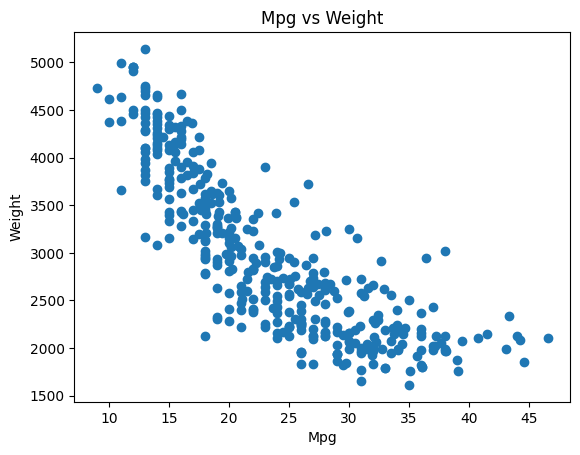

In [32]:
import matplotlib.pyplot as plt
plt.scatter(mpg['mpg'], mpg['weight'])
plt.xlabel('Mpg')
plt.ylabel('Weight')
plt.title('Mpg vs Weight')
plt.show()

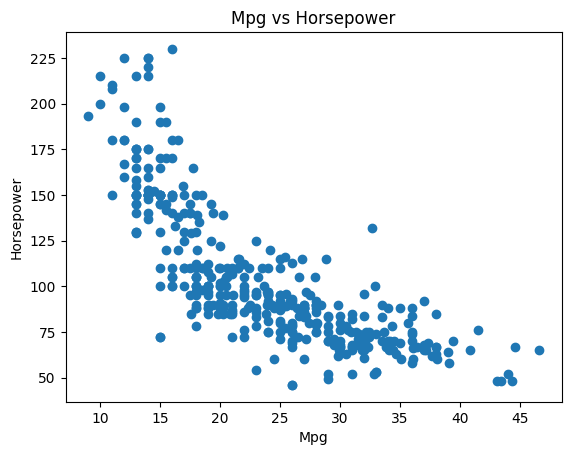

In [34]:
plt.scatter(mpg['mpg'], mpg['horsepower'])
plt.xlabel('Mpg')
plt.ylabel('Horsepower')
plt.title('Mpg vs Horsepower')
plt.show()

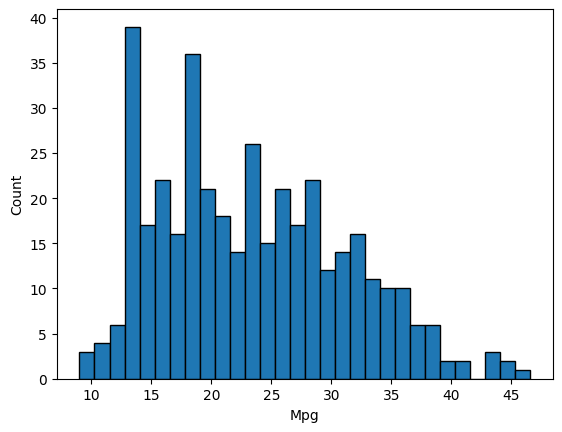

In [43]:
plt.hist(mpg['mpg'], bins=30 , edgecolor='black')
plt.xlabel('Mpg')
plt.ylabel('Count')
plt.show()

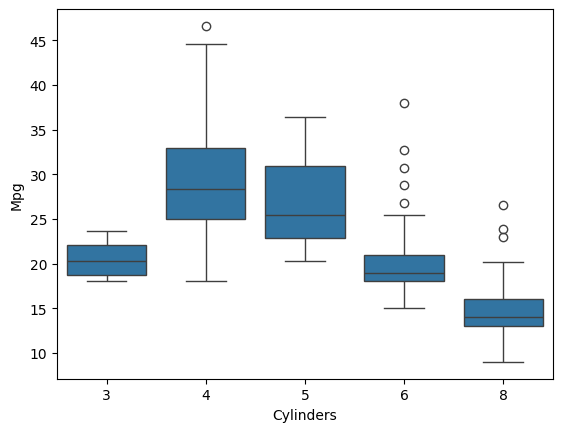

In [51]:
import seaborn as sns

sns.boxplot(x='cylinders', y='mpg', data=mpg)
plt.xlabel('Cylinders')
plt.ylabel('Mpg')
plt.show()

# 1. Linear regression on mpg dataset


### a) We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.

In [56]:
mpg.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
170,23.0,4,140.0,78.0,2592,18.5,75,usa,pontiac astro


In [ ]:
X , y = mpg.drop(['mpg', 'origin', 'name'], axis=1) , mpg['mpg']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((313, 6), (79, 6), (313,), (79,))